In [1]:
from __future__ import print_function, division
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# A bunch of utility functions

def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

def preprocess_img(x):
    return 2 * x - 1.0

def deprocess_img(x):
    return (x + 1.0) / 2.0

def rel_error(x,y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def count_params():
    """Count the number of parameters in the current TensorFlow graph """
    param_count = np.sum([np.prod(x.get_shape().as_list()) for x in tf.global_variables()])
    return param_count


def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

answers = np.load('gan-checks-tf.npz')


Extracting ./cs231n/datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./cs231n/datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./cs231n/datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./cs231n/datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


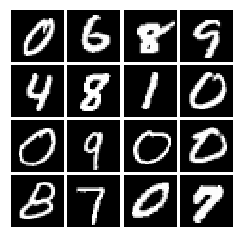

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./cs231n/datasets/MNIST_data', one_hot=False)

# show a batch
show_images(mnist.train.next_batch(16)[0])

In [3]:
def leaky_relu(x, alpha=0.01):
    """Compute the leaky ReLU activation function.
    
    Inputs:
    - x: TensorFlow Tensor with arbitrary shape
    - alpha: leak parameter for leaky ReLU
    
    Returns:
    TensorFlow Tensor with the same shape as x
    """
    # TODO: implement leaky ReLU
    #pass
    return tf.maximum(x,alpha*x)

Make sure noise is the correct shape and type:

In [4]:
def discriminator(x):
    """Compute discriminator score for a batch of input images.
    
    Inputs:
    - x: TensorFlow Tensor of flattened input images, shape [batch_size, 784]
    
    Returns:
    TensorFlow Tensor with shape [batch_size, 1], containing the score 
    for an image being real for each input image.
    """
    with tf.variable_scope("discriminator"):
        # TODO: implement architecture
        #pass
        
        x=tf.reshape(x,[-1,28,28,1])
        
        conv_1=tf.layers.conv2d(x,filters=32,strides=1,kernel_size=[5,5],activation=leaky_relu)
        maxp_1=tf.layers.max_pooling2d(conv_1,strides=2,pool_size=[2,2])
        
        conv_2=tf.layers.conv2d(maxp_1,filters=64,strides=1,kernel_size=[5,5],activation=leaky_relu)
        maxp_2=tf.layers.max_pooling2d(conv_2,strides=2,pool_size=[2,2])
        
        #print(maxp_2)
        
        layer_flat=tf.reshape(maxp_2,[-1,1024])
        #print(layer_flat)

        fc_1=tf.layers.dense(layer_flat,units=1024,activation=leaky_relu)
        fc_2=tf.layers.dense(fc_1,units=1)
        logits=fc_2 
            
        return logits
test_discriminator(1102721)

NameError: name 'test_discriminator' is not defined

In [ ]:
def sample_noise(batch_size, dim):
    """Generate random uniform noise from -1 to 1.
    
    Inputs:
    - batch_size: integer giving the batch size of noise to generate
    - dim: integer giving the dimension of the the noise to generate
    
    Returns:
    TensorFlow Tensor containing uniform noise in [-1, 1] with shape [batch_size, dim]
    """
    # TODO: sample and return noise
    #pass
    
    random_noise = tf.random_uniform(maxval=1,minval=-1,shape=[batch_size, dim])
    
    return random_noise

In [ ]:
def lsgan_loss(score_real, score_fake):
    """Compute the Least Squares GAN loss.
    
    Inputs:
    - score_real: Tensor, shape [batch_size, 1], output of discriminator
        score for each real image
    - score_fake: Tensor, shape[batch_size, 1], output of discriminator
        score for each fake image    
          
    Returns:
    - D_loss: discriminator loss scalar
    - G_loss: generator loss scalar
    """
    # TODO: compute D_loss and G_loss
    #D_loss = None
    #G_loss = None
    #pass
    
    
    true_labels = tf.ones_like(score_fake)
    
    D_loss_real=tf.reduce_mean((score_real-true_labels)**2)
    D_loss_fake=tf.reduce_mean((score_fake**2))
    
    D_loss=0.5*(D_loss_real+D_loss_fake)
    
    G_loss=0.5*tf.reduce_mean((score_fake-true_labels)**2)
    
    
    
    
    return D_loss, G_loss

In [ ]:
def generator(z):
    """Generate images from a random noise vector.
    
    Inputs:
    - z: TensorFlow Tensor of random noise with shape [batch_size, noise_dim]
    
    Returns:
    TensorFlow Tensor of generated images, with shape [batch_size, 784].
    """
    with tf.variable_scope("generator"):
        # TODO: implement architecture
        #pass
        #print(z.shape)
        fc_1=    tf.layers.dense(z,units=1024,activation=tf.nn.relu)
        batch_1= tf.layers.batch_normalization(fc_1,training=True)
        
        fc_2  =   tf.layers.dense(batch_1,units=7*7*128,activation=tf.nn.relu)
        batch_2=   tf.layers.batch_normalization(fc_2,training=True)
        
        
        layer= tf.reshape(batch_2,[-1,7,7,128])
        
        conv_transpose1 = tf.layers.conv2d_transpose(inputs=layer, filters=64, kernel_size=4, strides=2, activation=tf.nn.relu,
                                                    padding='same')
        bn3 = tf.layers.batch_normalization(inputs=conv_transpose1, training=True)
        
        conv_transpose2 = tf.layers.conv2d_transpose(inputs=bn3, filters=1, kernel_size=4, strides=2, activation=tf.nn.tanh,
                                        padding='same')
        
        img = tf.reshape(conv_transpose2, shape=[-1, 784])
        
        return img
test_generator(6595521)

In [ ]:
# TODO: create an AdamOptimizer for D_solver and G_solver
def get_solvers(learning_rate=1e-3, beta1=0.5):
    """Create solvers for GAN training.
    
    Inputs:
    - learning_rate: learning rate to use for both solvers
    - beta1: beta1 parameter for both solvers (first moment decay)
    
    Returns:
    - D_solver: instance of tf.train.AdamOptimizer with correct learning_rate and beta1
    - G_solver: instance of tf.train.AdamOptimizer with correct learning_rate and beta1
    """
    D_solver = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1)
    G_solver = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1)
    #pass
    return D_solver, G_solver

In [ ]:
D_loss, G_loss = lsgan_loss(logits_real, logits_fake)
D_train_step = D_solver.minimize(D_loss, var_list=D_vars)
G_train_step = G_solver.minimize(G_loss, var_list=G_vars)

In [ ]:
tf.reset_default_graph()

batch_size = 128
# our noise dimension
noise_dim = 96

# placeholders for images from the training dataset
x = tf.placeholder(tf.float32, [None, 784])
z = sample_noise(batch_size, noise_dim)
# generated images
G_sample = generator(z)

with tf.variable_scope("") as scope:
    #scale images to be -1 to 1
    logits_real = discriminator(preprocess_img(x))
    # Re-use discriminator weights on new inputs
    scope.reuse_variables()
    logits_fake = discriminator(G_sample)

# Get the list of variables for the discriminator and generator
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'generator') 

D_solver,G_solver = get_solvers()
D_loss, G_loss = gan_loss(logits_real, logits_fake)
D_train_step = D_solver.minimize(D_loss, var_list=D_vars)
G_train_step = G_solver.minimize(G_loss, var_list=G_vars)
D_extra_step = tf.get_collection(tf.GraphKeys.UPDATE_OPS,'discriminator')
G_extra_step = tf.get_collection(tf.GraphKeys.UPDATE_OPS,'generator')

In [ ]:
# a giant helper function
def run_a_gan(sess, G_train_step, G_loss, D_train_step, D_loss, G_extra_step, D_extra_step,\
              show_every=250, print_every=50, batch_size=128, num_epoch=10):
    """Train a GAN for a certain number of epochs.
    
    Inputs:
    - sess: A tf.Session that we want to use to run our data
    - G_train_step: A training step for the Generator
    - G_loss: Generator loss
    - D_train_step: A training step for the Generator
    - D_loss: Discriminator loss
    - G_extra_step: A collection of tf.GraphKeys.UPDATE_OPS for generator
    - D_extra_step: A collection of tf.GraphKeys.UPDATE_OPS for discriminator
    Returns:
        Nothing
    """
    # compute the number of iterations we need
    max_iter = int(mnist.train.num_examples*num_epoch/batch_size)
    for it in range(max_iter):
        # every show often, show a sample result
        if it % show_every == 0:
            samples = sess.run(G_sample)
            fig = show_images(samples[:16])
            plt.show()
            print()
        # run a batch of data through the network
        minibatch,minbatch_y = mnist.train.next_batch(batch_size)
        
        _, D_loss_curr = sess.run([D_train_step, D_loss], feed_dict={x: minibatch})#unsupervised
        _, G_loss_curr = sess.run([G_train_step, G_loss])

        # print loss every so often.
        # We want to make sure D_loss doesn't go to 0
        if it % print_every == 0:
            print('Iter: {}, D: {:.4}, G:{:.4}'.format(it,D_loss_curr,G_loss_curr))
    print('Final images')
    samples = sess.run(G_sample)

    fig = show_images(samples[:16])
    plt.show()

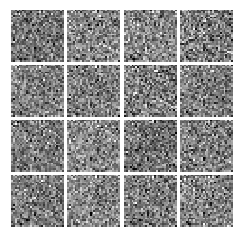


Iter: 0, D: 2.465, G:0.4676
Iter: 50, D: 0.07686, G:0.8562
Iter: 100, D: 0.3644, G:0.9064
Iter: 150, D: 0.2112, G:0.2194
Iter: 200, D: 0.07289, G:0.4829


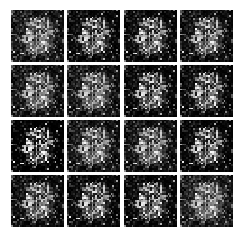


Iter: 250, D: 0.1009, G:0.366
Iter: 300, D: 0.07916, G:0.4704
Iter: 350, D: 0.08762, G:0.3448
Iter: 400, D: 0.4496, G:0.2124
Iter: 450, D: 0.1013, G:0.402


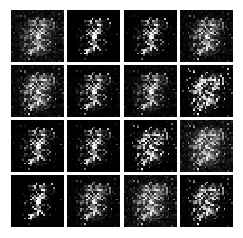


Iter: 500, D: 0.09295, G:0.424
Iter: 550, D: 0.2073, G:0.618
Iter: 600, D: 0.1261, G:0.444
Iter: 650, D: 0.07489, G:0.7876
Iter: 700, D: 0.1413, G:0.4144


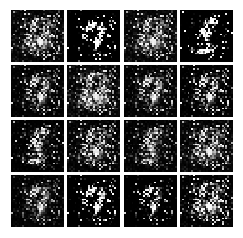


Iter: 750, D: 0.1643, G:0.3072
Iter: 800, D: 0.172, G:0.3251
Iter: 850, D: 0.08341, G:0.3565
Iter: 900, D: 0.1089, G:0.3694
Iter: 950, D: 0.1026, G:0.3576


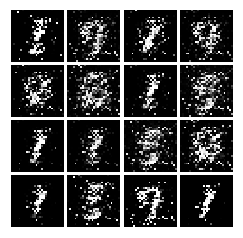


Iter: 1000, D: 0.17, G:0.2685
Iter: 1050, D: 0.1736, G:0.38
Iter: 1100, D: 0.2452, G:0.236
Iter: 1150, D: 0.2327, G:0.0457
Iter: 1200, D: 0.1188, G:0.4296


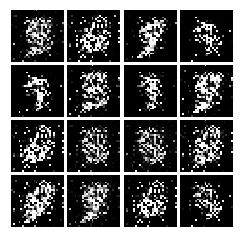


Iter: 1250, D: 0.1929, G:0.4635
Iter: 1300, D: 0.1954, G:0.4011
Iter: 1350, D: 0.1488, G:0.3012
Iter: 1400, D: 0.1282, G:0.3764
Iter: 1450, D: 0.1566, G:0.2505


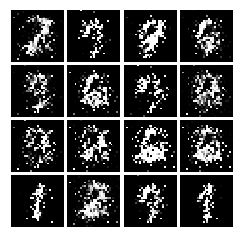


Iter: 1500, D: 0.5418, G:0.01646
Iter: 1550, D: 1.253, G:0.2626
Iter: 1600, D: 0.1515, G:0.2438
Iter: 1650, D: 0.2481, G:0.1702
Iter: 1700, D: 0.1386, G:0.2433


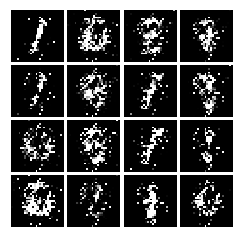


Iter: 1750, D: 0.1353, G:0.3641
Iter: 1800, D: 0.132, G:0.3221
Iter: 1850, D: 0.1887, G:0.2248
Iter: 1900, D: 0.1661, G:0.2882
Iter: 1950, D: 0.1805, G:0.2402


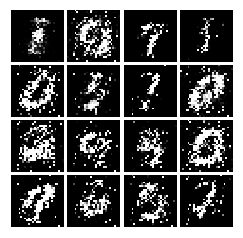


Iter: 2000, D: 0.1985, G:0.2201
Iter: 2050, D: 0.2188, G:0.2028
Iter: 2100, D: 0.1893, G:0.2036
Iter: 2150, D: 0.2152, G:0.1711
Iter: 2200, D: 0.2002, G:0.1854


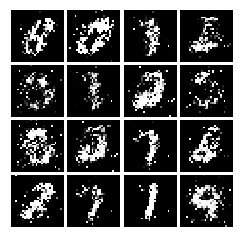


Iter: 2250, D: 0.2022, G:0.231
Iter: 2300, D: 0.2115, G:0.193
Iter: 2350, D: 0.2103, G:0.2146
Iter: 2400, D: 0.209, G:0.1819
Iter: 2450, D: 0.2394, G:0.1769


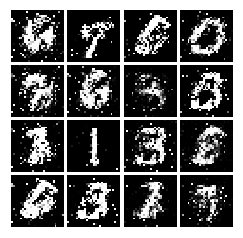


Iter: 2500, D: 0.2185, G:0.1698
Iter: 2550, D: 0.2214, G:0.163
Iter: 2600, D: 0.2094, G:0.1841
Iter: 2650, D: 0.2301, G:0.1643
Iter: 2700, D: 0.2169, G:0.1734


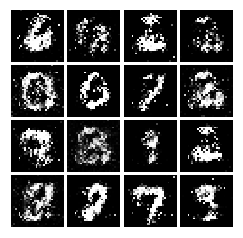


Iter: 2750, D: 0.2397, G:0.2064
Iter: 2800, D: 0.2101, G:0.2066
Iter: 2850, D: 0.2315, G:0.1995
Iter: 2900, D: 0.2668, G:0.1749
Iter: 2950, D: 0.2326, G:0.1875


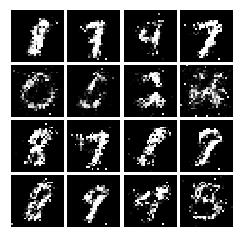


Iter: 3000, D: 0.2423, G:0.1812
Iter: 3050, D: 0.2198, G:0.1864
Iter: 3100, D: 0.2129, G:0.1928
Iter: 3150, D: 0.2181, G:0.1964
Iter: 3200, D: 0.2125, G:0.1582


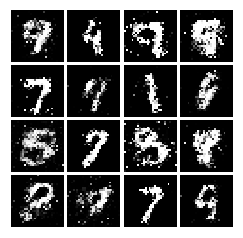


Iter: 3250, D: 0.2249, G:0.1663
Iter: 3300, D: 0.2196, G:0.1745
Iter: 3350, D: 0.2342, G:0.1798
Iter: 3400, D: 0.2205, G:0.1736
Iter: 3450, D: 0.2137, G:0.1708


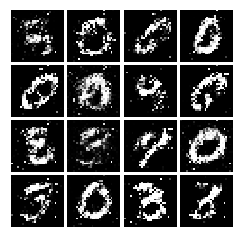


Iter: 3500, D: 0.2369, G:0.1497
Iter: 3550, D: 0.2286, G:0.1916
Iter: 3600, D: 0.244, G:0.2064
Iter: 3650, D: 0.2399, G:0.1578
Iter: 3700, D: 0.2266, G:0.1608


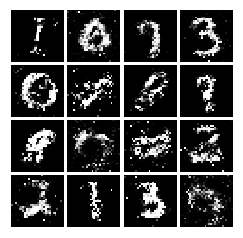


Iter: 3750, D: 0.2053, G:0.1726
Iter: 3800, D: 0.2302, G:0.1716
Iter: 3850, D: 0.2221, G:0.17
Iter: 3900, D: 0.2228, G:0.197
Iter: 3950, D: 0.2087, G:0.1595


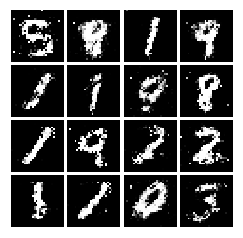


Iter: 4000, D: 0.2195, G:0.1514
Iter: 4050, D: 0.2254, G:0.1787
Iter: 4100, D: 0.2148, G:0.1737
Iter: 4150, D: 0.2342, G:0.179
Iter: 4200, D: 0.222, G:0.1566


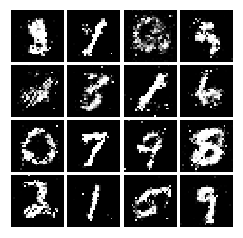


Iter: 4250, D: 0.2318, G:0.215
Final images


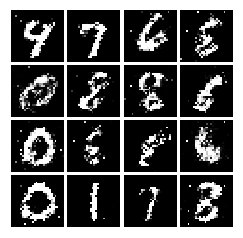

In [34]:
with get_session() as sess:
    sess.run(tf.global_variables_initializer())
    run_a_gan(sess, G_train_step, G_loss, D_train_step, D_loss, G_extra_step, D_extra_step)